In [37]:
import numpy as np
import sys
import glob 
import os 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio

In [38]:
mouseName = "GF193"
nframes = 211

# Hardcoded paths to the server
datapath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\' + mouseName + "\\" 
serverpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\Imaging\\'
behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

# Detect the operating system to fix the slashes

if (os.name == "posix"):
    print("Linux or MacOS system detected")
    
    #Play with the names only important for MacOS
    
    datapath= datapath.replace('\\','/')
    datapath = '/Volumes/' + datapath[18:] 
    behavpath = behavpath.replace('\\','/')
    behavpath = '/Volumes' + behavpath[18:] 
    serverpath = serverpath.replace('\\','/')
    serverpath = '/Volumes' + serverpath[18:] 
    
else:
    print("Windows system detected")

# Find the imaging days
imaging_days = glob.glob(os.path.join(datapath, "GF*"))

for n,f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)

# Thats a list of dictionaries where all the days for one mouse will be stored
AllData = []

for i,f in enumerate(imaging_days):
    
    print('Loading day : ' + imaging_days[i])
    
    #Create the paths to the suite2p files

    F_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "F.npy"
    Fneu_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "Fneu.npy"
    iscell_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "iscell.npy"
    spks_path = datapath + imaging_days[i] + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "spks.npy"

    F = np.load(F_path)
    Fneu = np.load(Fneu_path)
    spks = np.load(spks_path)
    iscell = np.load(iscell_path)

    #Keep only the ROIs detected as cells 
        
    F = F[iscell[:,0]==1.]
    Fneu = Fneu[iscell[:,0]==1.]
    spks = spks[iscell[:,0]==1.]

    print('Number of Selected ROIs : ' + str(F.shape[0]))
    
    #Load the behaviour files from the server (.mat files)

    behav_path = behavpath + imaging_days[i] + os.sep + 'BehavResults.mat'

    print('Loading behaviour: ' + behav_path)

    beh = sio.loadmat(behav_path)

    vals = beh['BehavResults'][0,0]

    keys = beh['BehavResults'][0,0].dtype.descr

    beh = np.array(vals[keys[0][0]][:][:])
    
    #keep the performance column from the behaviour file

    performance = beh[:,9]
    
    #Load the frames info from the server (.mat files)

    frames_path = serverpath + imaging_days[i] + os.sep + 'TrialFrames.mat'

    print('Loading frame info: ' +  frames_path)

    frames = sio.loadmat(frames_path)

    numOfFrames = frames['NumOfFrames']

    numOfFrames = np.array(numOfFrames)

    # Create an empty dict from every day to store the data

    daysDict = dict.fromkeys(['dayName','WM','AM','WH','AH','CR','FA'])


    #Create an empty dict from every trial type and measure of suite2p 
    
    dataDictWM = dict.fromkeys(['WMF','WMFneu','WMspks'])
    dataDictWH = dict.fromkeys(['WHF','WHFneu','WHspks'])
    dataDictAH = dict.fromkeys(['AHF','AHFneu','AHspks'])
    dataDictAM = dict.fromkeys(['AMF','AMFneu','AMspks'])
    dataDictFA = dict.fromkeys(['FAF','FAFneu','FAspks'])
    dataDictCR = dict.fromkeys(['CRF','CRFneu','CRspks'])

    #Trial type counters all set to zero

    WMc = 0;
    AMc = 0;
    WHc = 0;
    AHc = 0;
    CRc = 0;
    FAc = 0;

    # Initalise the data core structure as an numpy array or dimensions cells x frames x trials for every trial type 
  

    WMF = np.zeros([F.shape[0],nframes,sum(performance == 0.0)])
    WMFneu = np.zeros([F.shape[0],nframes,sum(performance == 0.0)])
    WMspks = np.zeros([F.shape[0],nframes,sum(performance == 0.0)])

    AMF = np.zeros([F.shape[0],nframes,sum(performance == 1.0)])
    AMFneu = np.zeros([F.shape[0],nframes,sum(performance == 1.0)])
    AMspks = np.zeros([F.shape[0],nframes,sum(performance == 1.0)])

    WHF = np.zeros([F.shape[0],nframes,sum(performance == 2.0)])
    WHFneu = np.zeros([F.shape[0],nframes,sum(performance == 2.0)])
    WHspks = np.zeros([F.shape[0],nframes,sum(performance == 2.0)])

    AHF = np.zeros([F.shape[0],nframes,sum(performance == 3.0)])
    AHFneu = np.zeros([F.shape[0],nframes,sum(performance == 3.0)])
    AHspks = np.zeros([F.shape[0],nframes,sum(performance == 3.0)])

    CRF = np.zeros([F.shape[0],nframes,sum(performance == 4.0)])
    CRFneu = np.zeros([F.shape[0],nframes,sum(performance == 4.0)])
    CRspks = np.zeros([F.shape[0],nframes,sum(performance == 4.0)])

    FAF = np.zeros([F.shape[0],nframes,sum(performance == 5.0)])
    FAFneu = np.zeros([F.shape[0],nframes,sum(performance == 5.0)])
    FAspks = np.zeros([F.shape[0],nframes,sum(performance == 5.0)])


    for t in range(len(performance)):
        
        #Check the performance outcome using the frame info read the num of frames from the long suite2p vector
        
        if performance[t] == 0.0:
            WMF[:,:,WMc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            WMFneu[:,:,WMc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            WMspks[:,:,WMc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            WMc += 1 

        elif performance[t] == 1.0:
            AMF[:,:,AMc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            AMFneu[:,:,AMc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            AMspks[:,:,AMc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            AMc += 1  

        elif performance[t] == 2.0:
            WHF[:,:,WHc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            WHFneu[:,:,WHc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            WHspks[:,:,WHc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            WHc += 1

        elif performance[t] == 3.0:
            AHF[:,:,AHc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            AHFneu[:,:,AHc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            AHspks[:,:,AHc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            AHc += 1

        elif performance[t] == 4.0:
            CRF[:,:,CRc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            CRFneu[:,:,CRc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            CRspks[:,:,CRc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            CRc += 1

        elif performance[t] == 5.0:
            FAF[:,:,FAc] = F[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            FAFneu[:,:,FAc] = Fneu[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            FAspks[:,:,FAc] = spks[:,int(np.sum(numOfFrames[0:t])):int((np.sum(numOfFrames[0:t])+ 211))]
            FAc += 1 
            
    
    # Store numpy matrices to the dictionaries for each trial type
    dataDictWM = {'WMF' : WMF ,
                  'WMFneu' : WMFneu,
                  'WMspks' : WMspks
    }
    dataDictWH = {'WHF' : WHF ,
                  'WHFneu' : WHFneu,
                  'WHspks' : WHspks
    }
    dataDictAM = {'AMF' : AMF ,
                  'AMFneu' : AMFneu,
                  'AMspks' : AMspks
    }
    dataDictAH = {'AHF' : AHF ,
                  'AHFneu' : AHFneu,
                  'AHspks' : AHspks
    }
    dataDictCR = {'CRF' : CRF ,
                  'CRFneu' : CRFneu,
                  'CRspks' : CRspks
    }
    dataDictFA = {'FAF' : FAF ,
                  'FAFneu' : FAFneu,
                  'FAspks' : FAspks
    }
    
    # Store the small dicts i the big dict of each day together with its name 
    daysDict = { 'dayName' : imaging_days[i],
                 'WM' : dataDictWM,
                 'WH' : dataDictWH,
                 'AM' : dataDictAM,
                 'AH' : dataDictAH,
                 'CR' : dataDictCR,
                 'FA' : dataDictFA,
    }
    #Append the big list for all the data for one mouse
    AllData.append(daysDict)


Windows system detected
Loading day : GF193_20062019
Number of Selected ROIs : 373
Loading behaviour: \\sv1files.epfl.ch\Petersen-Lab\data\GF193\Recordings\BehaviourFiles\GF193_20062019\BehavResults.mat
Loading frame info: \\sv1files.epfl.ch\Petersen-Lab\data\GF193\Recordings\Imaging\GF193_20062019\TrialFrames.mat
Loading day : GF193_21062019
Number of Selected ROIs : 220
Loading behaviour: \\sv1files.epfl.ch\Petersen-Lab\data\GF193\Recordings\BehaviourFiles\GF193_21062019\BehavResults.mat
Loading frame info: \\sv1files.epfl.ch\Petersen-Lab\data\GF193\Recordings\Imaging\GF193_21062019\TrialFrames.mat
Loading day : GF193_22062019
Number of Selected ROIs : 226
Loading behaviour: \\sv1files.epfl.ch\Petersen-Lab\data\GF193\Recordings\BehaviourFiles\GF193_22062019\BehavResults.mat
Loading frame info: \\sv1files.epfl.ch\Petersen-Lab\data\GF193\Recordings\Imaging\GF193_22062019\TrialFrames.mat
Loading day : GF193_23062019
Number of Selected ROIs : 346
Loading behaviour: \\sv1files.epfl.ch\Pet

In [49]:
AllData[5]['dayName']

'GF193_25062019'

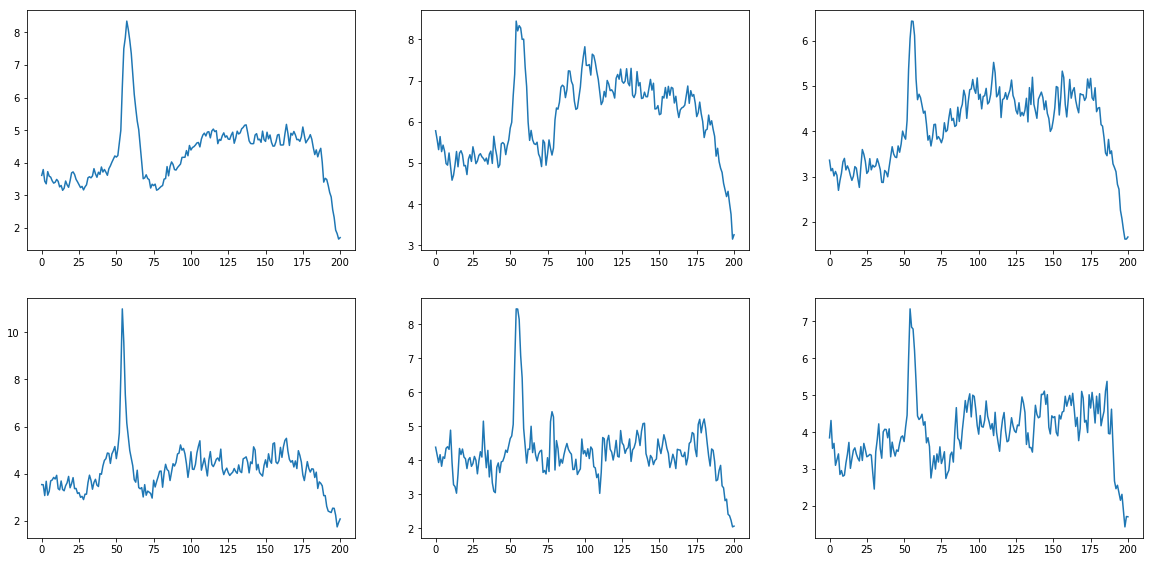

In [64]:
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.plot(np.mean(AllData[i]['AH']['AHspks'],axis = (0,2))[10:])

In [ ]:
i = 1
plt